# Digit recognition with Multi-Layer Perceptron 

In [1]:
import tensorflow as tf
import numpy as np

%matplotlib inline

/home/javier/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Training parameters
num_iterations = 20000
batch_size = 50
learning_rate = 1e-3

In [3]:
# Loading data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# Initialize session
sess = tf.InteractiveSession()

# Define inputs and outputs placeholder
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])


Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions f

Network:

In [4]:
# Softmax layer
# X inputs

# Input layer
# Number of neurons, input layer and independent term
N_in = 100
W_in = tf.Variable(tf.truncated_normal([784, N_in], stddev=0.1))   
b_in = tf.Variable(tf.zeros([N_in]))

# Output of first layer
h_1 = tf.matmul(x, W_in) + b_in
h_1 = tf.nn.relu(h_1)

# Hidden layer
# Number of outputs, and independent term
N_out = 10
W_out = tf.Variable(tf.zeros([N_in, N_out]))
b_out = tf.Variable(tf.zeros([N_out]))

# Output of output layer
y = tf.matmul(h_1, W_out) + b_out


In [5]:
# Training and test nodes
J = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

train_step = tf.train.AdamOptimizer(learning_rate).minimize(J)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(tf.global_variables_initializer())

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [ ]:
train_accuracy_list=[]
train_accuracy_index=[]
test_accuracy_list=[]
test_accuracy_index=[]

for i in range(num_iterations):
  batch = mnist.train.next_batch(batch_size)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1]})
    print("step %d, training accuracy %g"%(i, train_accuracy))
    train_accuracy_list.append(train_accuracy)
    train_accuracy_index.append(i)
  if i%500 == 0:
    test_accuracy = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels})
    print("------------------------------->>test accuracy %g"%test_accuracy)
    test_accuracy_list.append(test_accuracy)
    test_accuracy_index.append(i)

    
  train_step.run(feed_dict={x: batch[0], y_: batch[1]})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels}))

step 0, training accuracy 0.1
------------------------------->>test accuracy 0.098
step 100, training accuracy 0.88
step 200, training accuracy 0.76
step 300, training accuracy 0.9
step 400, training accuracy 0.88
step 500, training accuracy 0.92
------------------------------->>test accuracy 0.9068
step 600, training accuracy 0.92
step 700, training accuracy 0.94
step 800, training accuracy 0.94
step 900, training accuracy 0.92
step 1000, training accuracy 0.98
------------------------------->>test accuracy 0.9315
step 1100, training accuracy 0.88
step 1200, training accuracy 0.86
step 1300, training accuracy 0.94
step 1400, training accuracy 0.98
step 1500, training accuracy 0.94
------------------------------->>test accuracy 0.9463
step 1600, training accuracy 0.96
step 1700, training accuracy 0.92
step 1800, training accuracy 0.88
step 1900, training accuracy 0.96
step 2000, training accuracy 0.92
------------------------------->>test accuracy 0.9554
step 2100, training accuracy 0.

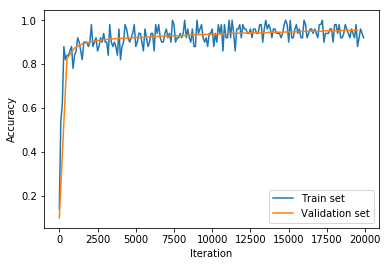

In [22]:
import matplotlib.pyplot as plt


plt.plot(train_accuracy_index, train_accuracy_list)
plt.plot(test_accuracy_index, test_accuracy_list)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend(['Train set', 'Validation set'],loc='lower right')
plt.show()

In [23]:
all_vars=tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)

num_param=sum([np.prod(np.array(var.op.outputs[0].shape.as_list())) for var in all_vars])

print('Number of variables in the network: ', num_param)

Number of variables in the network:  318040
